<a href="https://colab.research.google.com/github/louise-queiroz/bootcamp-data-analytics/blob/main/Frequencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Frequências

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_json('enem.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
# 1. Qual das disciplinas tem a maior amplitude de nota?
max = df.iloc[:, :-1].max(axis=0)
min = df.iloc[:, :-1].min(axis=0)

amplitude = max - min
disciplina = amplitude.idxmax()
maxAmplitude = amplitude.max()

print("\nDisciplina com a maior amplitude:")
print(f"{disciplina} - Amplitude: {maxAmplitude}")


Disciplina com a maior amplitude:
Redação - Amplitude: 729.1600351395


In [ ]:
# 2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)
media = df.mean()
print(f"Média: {media}")
dflimpo = df.dropna()
mediana = dflimpo.median()
print(f"Mediana: {mediana}")


Média: Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64
Mediana: Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64


<ipython-input-19-77eb38c24da1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media = df.mean()
<ipython-input-19-77eb38c24da1>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana = dflimpo.median()


In [ ]:
#3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
#a. Redação - 2
#b. Matemática e suas Tecnologias - 4
#c. Linguagens, Códigos e suas Tecnologias - 2
#d. Ciências Humanas e suas Tecnologias - 1
#e. Ciências da Natureza e suas Tecnologias - 1
#Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}
dfnotas = df.copy()
dfnotas *= pd.Series(pesos)
#media ponderada
dfnotas['Media Ponderada'] = dfnotas.sum(axis=1) / sum(pesos.values())

dftop500 = dfnotas.nlargest(500, 'Media Ponderada')

media_top500 = dftop500['Media Ponderada'].mean()
desvio_padrao_top500 = dftop500['Media Ponderada'].std()

print(f"Média ponderada das notas dos 500 estudantes mais bem colocados: {media_top500:.2f}")
print(f"Desvio padrão das notas dos 500 estudantes mais bem colocados: {desvio_padrao_top500:.2f}")

Média ponderada das notas dos 500 estudantes mais bem colocados: 561.88
Desvio padrão das notas dos 500 estudantes mais bem colocados: 35.99


In [ ]:
#4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?
dftop40 = dftop500.nlargest(40, 'Media Ponderada')
mediatop40 = dftop40['Media Ponderada'].mean()
desviotop40 = dftop40['Media Ponderada'].std()

print(f"Média ponderada das notas dos 40 estudantes aprovados: {mediatop40:.2f}")
print(f"Desvio padrão das notas dos 40 estudantes aprovados: {desviotop40:.2f}")


Média ponderada das notas dos 40 estudantes aprovados: 636.68
Desvio padrão das notas dos 40 estudantes aprovados: 17.20


In [ ]:
# 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

q3mat = df['Matemática'].quantile(0.75)
q3ling = df['Linguagens'].quantile(0.75)

# Exibe os resultados
print(f"Teto do terceiro quartil para Matemática: {q3mat:.2f}")
print(f"Teto do terceiro quartil para Linguagens: {q3ling:.2f}")

Teto do terceiro quartil para Matemática: 592.91
Teto do terceiro quartil para Linguagens: 571.64


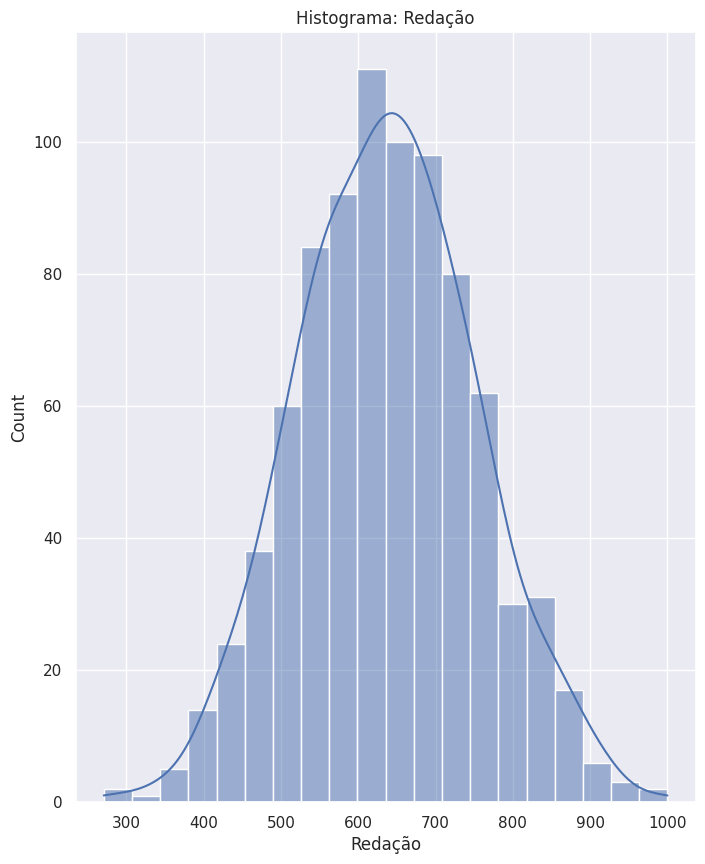

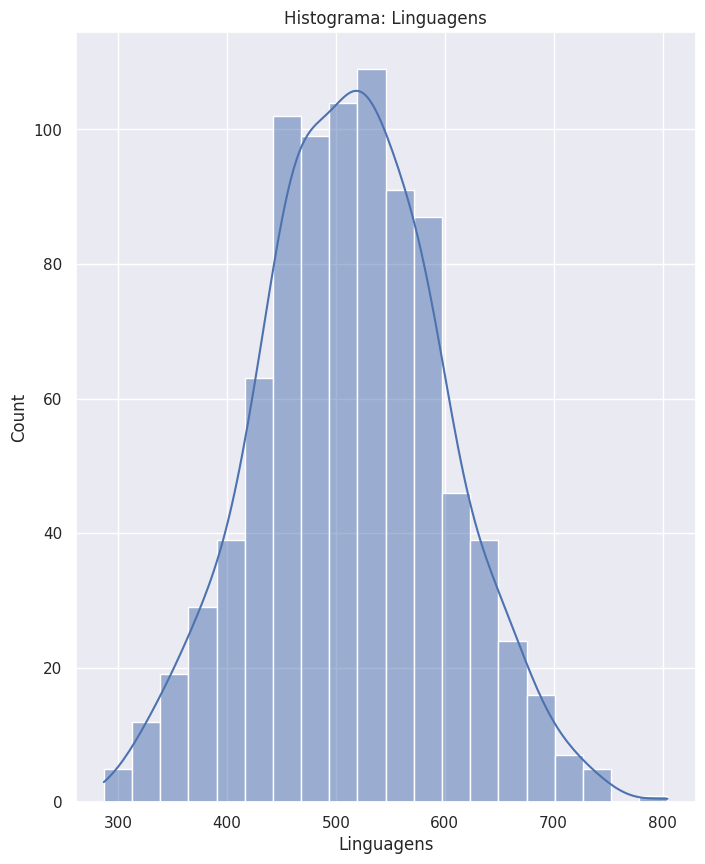

In [ ]:
#6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique
#se não assimétricas?
plt.rcParams['figure.figsize'] = [8,10]
sns.set_theme()
for column in df[['Redação', 'Linguagens']]:
    plt.figure()
    sns.histplot(data=df, x=column, bins = 20, kde=True)
    plt.title("Histograma: " + column)


Os histogramas são simétricos, caracterizados pela concentração central das variáveis, onde a média, mediana e moda estão equidistantes em relação aos extremos. Isso resulta em uma distribuição balanceada, sem a presença de caudas assimétricas.

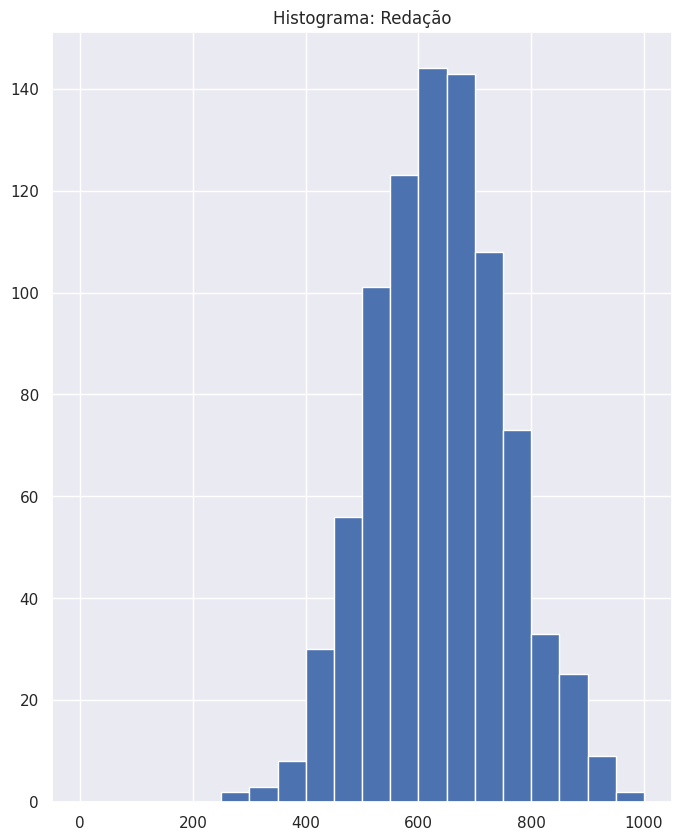

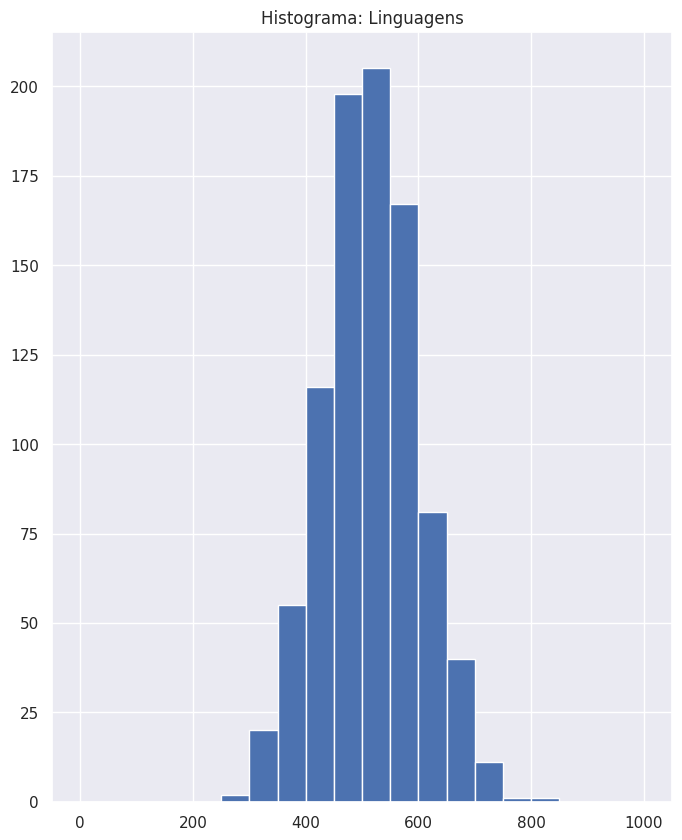

In [ ]:
# 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])
plt.rcParams['figure.figsize'] = [8,10]
sns.set_theme()
range_fixo = [0, 1000]

# Iteração sobre as colunas desejadas
for column in ['Redação', 'Linguagens']:
    plt.figure()
    plt.hist(df[column], bins=20, range=[0,1000])  # Utilize df[column] para acessar cada coluna separadamente
    plt.title("Histograma: " + column)

plt.show()

Agora os resultados mudaram, pois o histograma de Linguagens mantêm-se central, enquanto o de Redação é assimétrico à esquerda onde a maioria dos valores se encontram após a mediana.

Número de outliers:  2
Ciências da natureza:  [802.0045683513, 732.5029639878]
Número de outliers:  1
Redação:  [290.3086081677]


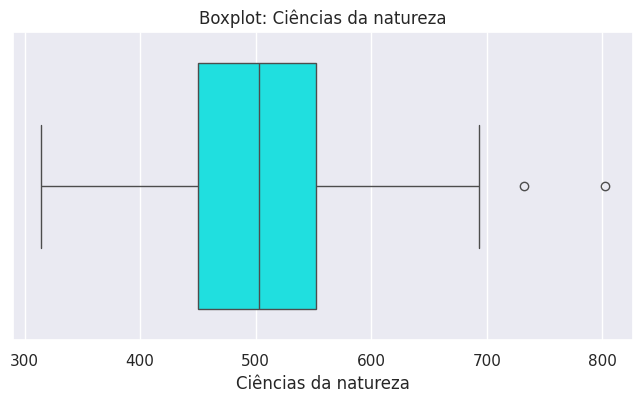

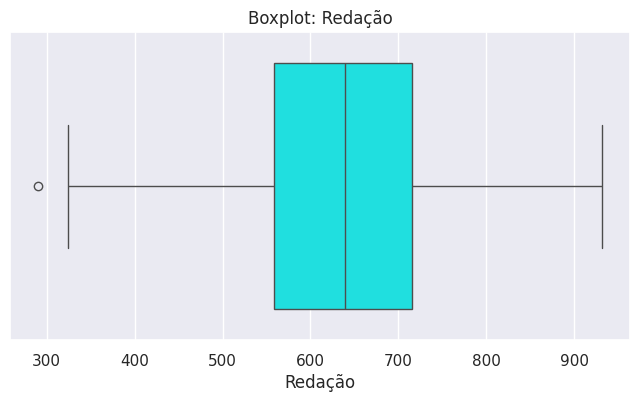

In [ ]:
#8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.
dfiqr = df.dropna()
plt.rcParams['figure.figsize'] = [8,4]
sns.set_theme()
for column in ['Ciências da natureza', 'Redação']:
  plt.figure()
  sns.boxplot(data = dfiqr, x = column, color='cyan', showfliers=True)
  plt.title("Boxplot: " +column)


def findOutlierIQR(dataset, colname):
  q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
  iqr = q75 - q25
  cutoff = iqr * 1.5
  lower, upper = q25 - cutoff, q75 + cutoff
  outliers = []
  for i in dataset[colname].values:
    if((i>upper) or (i<lower)):
      outliers.append(i)
  print('Número de outliers: ', len(outliers))
  return outliers

outliersCdn = findOutlierIQR(dfiqr, 'Ciências da natureza' )
print('Ciências da natureza: ', outliersCdn)
outliersRedacao = findOutlierIQR(dfiqr, 'Redação' )
print('Redação: ', outliersRedacao)

In [ ]:
#9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um
#valor acima de 5%)

#dfSemOutlier = df.drop(outliersCdn + outliersRedacao)
for column in ['Ciências da natureza', 'Redação']:
    dfSemOutlier = df[~df[column].isin(outliersCdn + outliersRedacao)]
media = df.mean()
mediaNova = dfSemOutlier.mean()

perc = ((mediaNova - media) / media) * 100
print('Média antiga: ', media)
print('Média nova: ', mediaNova)
print('Percentual: ', perc)


Média antiga:  Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64
Média nova:  Linguagens              514.480292
Ciências humanas        527.076193
Ciências da natureza    499.234340
Matemática              536.087664
Redação                 638.188043
dtype: float64
Percentual:  Linguagens             -0.008652
Ciências humanas        0.006434
Ciências da natureza   -0.016271
Matemática              0.022763
Redação                 0.063424
dtype: float64


<ipython-input-6-6a707f4ee940>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media = df.mean()
<ipython-input-6-6a707f4ee940>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediaNova = dfSemOutlier.mean()


Não alteraram a média significativamente.

In [ ]:
#10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou
#mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.
df = pd.read_json('enem.json') #reabri devido a alterações no dataframe original para retirada de NaN
media = df.mean().mean()
desvio = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].stack().std()

dfmedia = df.copy()
dfmoda = df.copy()
dfmediana = df.copy()

for column in ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']:
    moda = df[column].mode().iloc[0]
    mediana = df[column].median()

    dfmoda[column].fillna(value=moda, inplace=True)
    dfmedia[column].fillna(value=media, inplace=True)
    dfmediana[column].fillna(value=mediana, inplace=True)

medianova = dfmedia.mean().mean()
modanova = dfmoda.mean().mean()
mediananova = dfmediana.mean().mean()

percmedia = ((medianova - media) / media) * 100
percmoda = ((modanova - media) / media) * 100
percmediana = ((mediananova - media) / media) * 100

desviomedia = dfmedia[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].stack().std()
desviomoda = dfmoda[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].stack().std()
desviomediana = dfmediana[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].stack().std()
print(f"Média original:\n {media}\n")
print(f"Porcentagem de mudança ao trocar nulo pela média:\n {percmedia}\n")
print(f"Porcentagem de mudança ao trocar nulo pela moda:\n {percmoda}\n")
print(f"Porcentagem de mudança ao trocar nulo pela mediana:\n {percmediana}\n")
print('---------------')
print(f"Desvio padrão original:\n {desvio}")
print('Desvio padrão com a mudança da média: \n', desviomedia)
print('Desvio padrão com a mudança da moda: \n', desviomoda)
print('Desvio padrão com a mudança da mediana: \n', desviomediana)

Média original:
 542.9263730172955

Porcentagem de mudança ao trocar nulo pela média:
 -0.041756897506003074

Porcentagem de mudança ao trocar nulo pela moda:
 -5.118852219667046

Porcentagem de mudança ao trocar nulo pela mediana:
 -0.01697895474336461

---------------
Desvio padrão original:
 101.51639307718578
Desvio padrão com a mudança da média: 
 95.67230752869943
Desvio padrão com a mudança da moda: 
 123.36423610882277
Desvio padrão com a mudança da mediana: 
 97.35132379771272


<ipython-input-50-f99ef5017002>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media = df.mean().mean()
<ipython-input-50-f99ef5017002>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medianova = dfmedia.mean().mean()
<ipython-input-50-f99ef5017002>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  

Com base nos resultados, nota-se que a melhor opção é trocar pela mediana. Pois é o mais próximo da média e a média do desvio é a mais próxima.